# Qustion 2:

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
df['quality'] = (df['quality'] > 5).astype(int)
X, y = df.drop(columns=['quality']).to_numpy(), df['quality'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state = 42)

## 1.

In [18]:
dt = DecisionTreeClassifier(max_depth=12, random_state=0)
dt = dt.fit(X_train, y_train)
train_accuracy = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
test_accuracy = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Train Accuracy: 98.96%
Test Accuracy: 72.81%


## 2.

Train Accuracy: 99.90%
Test Accuracy: 80.16%


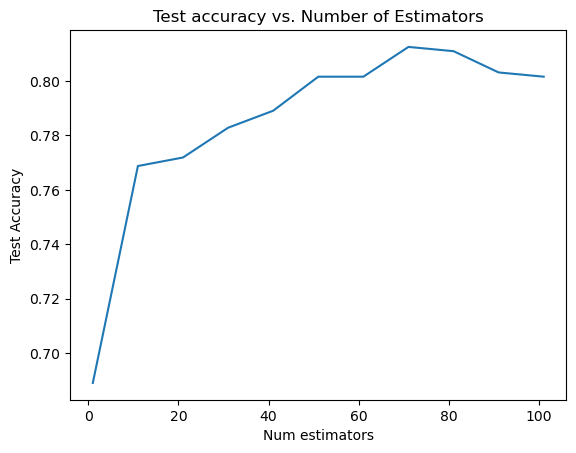

In [38]:
rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=0)
rf = rf.fit(X_train, y_train)
train_accuracy = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
test_accuracy = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

values = []
n_estimators = list(range(1, 110, 10))

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, max_depth=12, random_state=0)
    rf = rf.fit(X_train, y_train)
    values.append(accuracy_score(y_true=y_test, y_pred=rf.predict(X_test)))

plt.plot(n_estimators, values)
plt.title('Test accuracy vs. Number of Estimators')
plt.xlabel('Num estimators')
plt.ylabel('Test Accuracy')
plt.show()

## 3.

Train Accuracy: 99.90%
Test Accuracy: 78.75%


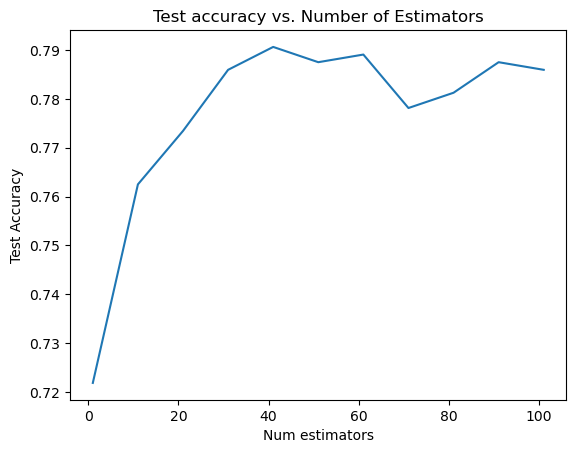

In [47]:
rf = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=0, max_features=11)
rf = rf.fit(X_train, y_train)
train_accuracy = accuracy_score(y_true=y_train, y_pred=rf.predict(X_train))
test_accuracy = accuracy_score(y_true=y_test, y_pred=rf.predict(X_test))
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

values = []
n_estimators = list(range(1, 110, 10))

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators=n, max_depth=12, random_state=0, max_features=11)
    rf = rf.fit(X_train, y_train)
    values.append(accuracy_score(y_true=y_test, y_pred=rf.predict(X_test)))

plt.plot(n_estimators, values)
plt.title('Test accuracy vs. Number of Estimators')
plt.xlabel('Num estimators')
plt.ylabel('Test Accuracy')
plt.show()

## 4.
A) The model in section B is better than the model in section A because it has more regularization. Instead of relying on a single tree, we use the principle of bootstrapping and employ 100 trees.

B) The model in section C is worse than the model in section B because we don't prevent it from overfitting. The model uses all the features at every split, instead of just the square root of the number of features, which is the default value in the library.